<a href="https://colab.research.google.com/github/Zyzzas1/zyzz/blob/main/model.size%3C500kb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

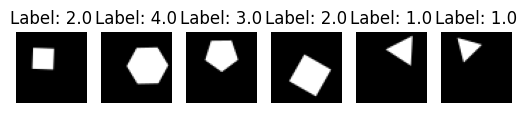

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Replace X and y with your actual data
# For example, if your data is in a pandas DataFrame, you can use df['X'] and df['y']




for i in range(6):
    plt.subplot(1, 6, i + 1)
    plt.imshow(X[i], cmap='gray')  # Assuming grayscale images
    plt.title(f'Label: {y[i]}')
    plt.axis('off')

plt.show()


In [1]:
%matplotlib inline

import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, BatchNormalization, \
                                    Activation, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense


In [2]:
import requests

# URL of the raw file on GitHub
url = "https://github.com/trokas/ai_primer/raw/master/flatland_train.npz"

# Send an HTTP GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Save the content to a local file
    with open("flatland_train.npz", "wb") as file:
        file.write(response.content)
    print("File downloaded successfully.")
else:
    print(f"Failed to download the file. Status code: {response.status_code}")

File downloaded successfully.


In [3]:
data = np.load('flatland_train.npz')
X = data['X']
y = data['y']

y[y != 0] -= 2    # Correct labels so that triangle is mapped to class 1
X = X / 255.
dataDim = np.prod(y[0].shape)

In [4]:
dataDim.shape

()

In [5]:
unique_labels, label_counts = np.unique(y, return_counts=True)

# Print the results
for label, count in zip(unique_labels, label_counts):
    print(f'Label {label}: {count} occurrences')

Label 0.0: 1381 occurrences
Label 1.0: 2853 occurrences
Label 2.0: 1868 occurrences
Label 3.0: 2137 occurrences
Label 4.0: 1761 occurrences


In [6]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train shape:", X_train.shape)
print("X Test shape:", X_test.shape)
print("Y Train shape:", y_train.shape)
print("Y Test shape:", y_test.shape)

X Train shape: (8000, 50, 50)
X Test shape: (2000, 50, 50)
Y Train shape: (8000,)
Y Test shape: (2000,)


In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from keras.preprocessing.image import ImageDataGenerator
X_train = X_train.reshape(X_train.shape[0], 50, 50, 1)
X_val = X_test.reshape(X_test.shape[0], 50, 50, 1)

# Data augmentation
datagen.fit(X_train)
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=23,

    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))

# Flatten layer to transition from convolutional to dense layers
model.add(Flatten())

# Dense layers
model.add(Dense(80, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))


# Output layer
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 24, 24, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 1, 1, 128)        

In [23]:
from google.colab import files

files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: >

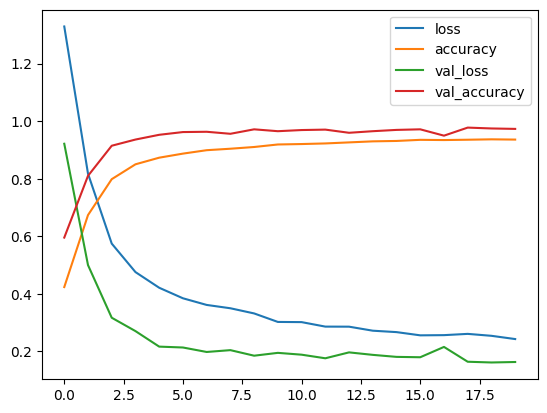

In [17]:
pd.DataFrame(loss.history).plot()

In [22]:


loss = model.fit(datagen.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test), batch_size=64, epochs=20)
model.save('model.h5')

Epoch 1/20
250/250 [==============================] - 6s 18ms/step - loss: 1.3115 - accuracy: 0.4387 - val_loss: 0.8795 - val_accuracy: 0.6275
Epoch 2/20
250/250 [==============================] - 6s 23ms/step - loss: 0.8383 - accuracy: 0.6644 - val_loss: 0.5346 - val_accuracy: 0.8310
Epoch 3/20
250/250 [==============================] - 4s 17ms/step - loss: 0.6054 - accuracy: 0.7847 - val_loss: 0.3491 - val_accuracy: 0.9235
Epoch 4/20
250/250 [==============================] - 6s 23ms/step - loss: 0.5135 - accuracy: 0.8328 - val_loss: 0.2973 - val_accuracy: 0.9330
Epoch 5/20
250/250 [==============================] - 4s 18ms/step - loss: 0.4484 - accuracy: 0.8677 - val_loss: 0.2460 - val_accuracy: 0.9560
Epoch 6/20
250/250 [==============================] - 4s 17ms/step - loss: 0.3946 - accuracy: 0.8867 - val_loss: 0.3927 - val_accuracy: 0.8720
Epoch 7/20
250/250 [==============================] - 6s 23ms/step - loss: 0.3888 - accuracy: 0.8842 - val_loss: 0.2518 - val_accuracy: 0.9450

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
